Exercise: Run the same analysis using 42K points with various 

### Let's import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d0 = pd.read_csv("train.csv")
d0.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#save the label feature into l
l = d0["label"]

#drop the label feature from d0
data = d0.drop("label",axis=1)
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(data.shape)
print(l.shape)

(42000, 784)
(42000,)


#### Display or plot number

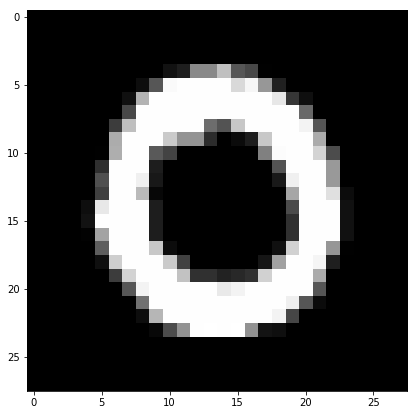

In [5]:
plt.figure(figsize=(7,7))

idx = 1
grid_data = data.iloc[idx].to_numpy().reshape(28,28) # reshape from 1D to 2D pixel array
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()

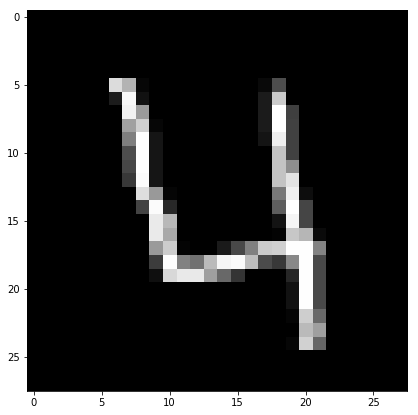

4


In [6]:
plt.figure(figsize=(7,7))

idx = 3
grid_data1 = data.iloc[idx].to_numpy().reshape(28,28)#reshape from 1D to 2d Pixel array

plt.imshow(grid_data1,interpolation = "none",cmap = "gray")
plt.show()
print(l[idx])

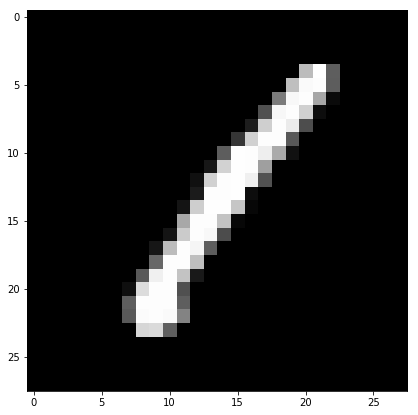

1


In [7]:
plt.figure(figsize = (7,7))

idx = 0

grid_data2 = data.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data2,interpolation="none",cmap = "gray")
plt.show()

print(l[idx])

In [8]:
print("The shape of data",data.shape)
print("The shape of l",l.shape)

The shape of data (42000, 784)
The shape of l (42000,)


In [9]:
#data-preprocessing : Standardized the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)

print(standardized_data.shape)


(42000, 784)


#### Find the covariance matrix

In [10]:
sample_data = standardized_data
print(sample_data.shape)
covar_matrix = np.matmul(sample_data.T,sample_data)
print("the shape of covar_matrix:",covar_matrix.shape)

(42000, 784)
the shape of covar_matrix: (784, 784)


#### Calculate the top 2 eigen vectors corresponding eigen values

In [11]:
from scipy.linalg import eigh

values,vectors = eigh(covar_matrix,eigvals=(782,783))

print("Shape of eigen vectors:",vectors.shape)

vectors = vectors.T
print("updated the shape of eigen vectors:",vectors.shape)


Shape of eigen vectors: (784, 2)
updated the shape of eigen vectors: (2, 784)


In [12]:
new_coordinates = np.matmul(vectors,sample_data.T)

print("resultant new coordinates:",vectors.shape,"X",sample_data.T.shape,"=",new_coordinates.shape)

resultant new coordinates: (2, 784) X (784, 42000) = (2, 42000)


#### Appending label to 2D projected data

In [13]:
new_coordinates = np.vstack((new_coordinates,l)).T

#creating a new dataframe for plotting the labeled data

dataframe = pd.DataFrame(new_coordinates,columns = ("1st principal","2nd principal","label"))
dataframe.head()

,1st principal,2nd principal,label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


#### Visualize the data

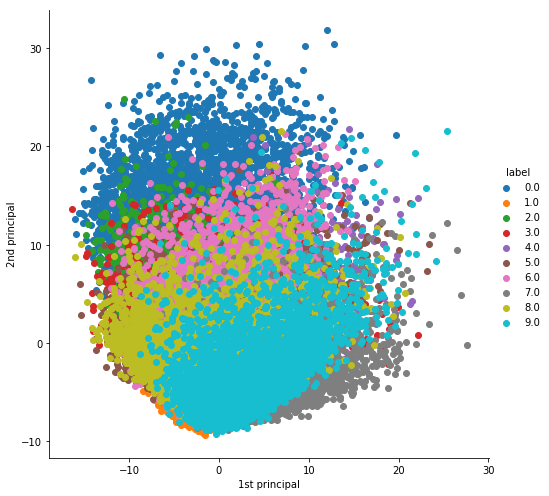

In [14]:
import warnings
warnings.filterwarnings("ignore")

sns.FacetGrid(dataframe,hue="label",size=7).map(plt.scatter,"1st principal","2nd principal").add_legend()
plt.show()

#### PCA using Scikit-learn

In [15]:
#initializing the PCA

from sklearn import decomposition
pca = decomposition.PCA()

In [16]:
pca.n_components = 2

pca_data = pca.fit_transform(sample_data)

print("the shape of pca_data",pca_data.shape)

the shape of pca_data (42000, 2)


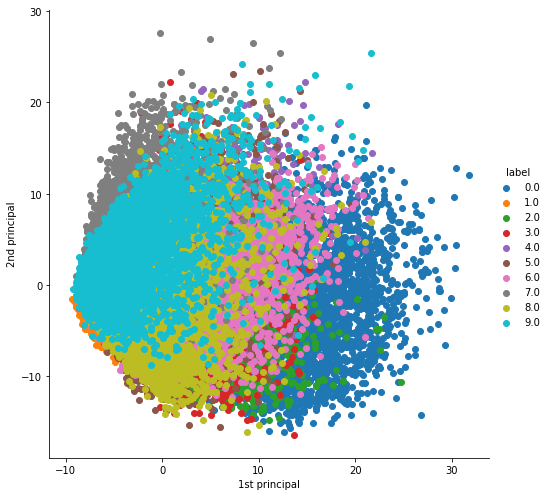

In [17]:
#appending the label

pca_data = np.vstack((pca_data.T,l)).T

#creating a new dataframe which help us in plotting the result data
pca_data = pd.DataFrame(data = pca_data,columns = ("1st principal","2nd principal","label"))
sns.FacetGrid(pca_data,hue="label",size=7).map(plt.scatter,"1st principal","2nd principal").add_legend()
plt.show()

#### T-SNE using Scikit - Learn

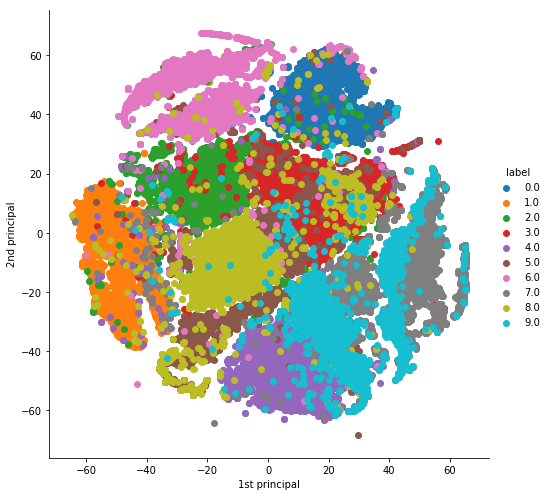

In [19]:
from sklearn.manifold import TSNE
data = standardized_data
model = TSNE(n_components=2,random_state=0)

tsne_data = model.fit_transform(sample_data)

#creating the new DataFrame
tsne_data = np.vstack((tsne_data.T,l)).T
tsne_df = pd.DataFrame(data = tsne_data,columns=("1st principal","2nd principal","label"))

sns.FacetGrid(tsne_df,hue = "label",size=7).map(plt.scatter,"1st principal","2nd principal").add_legend()

plt.show()

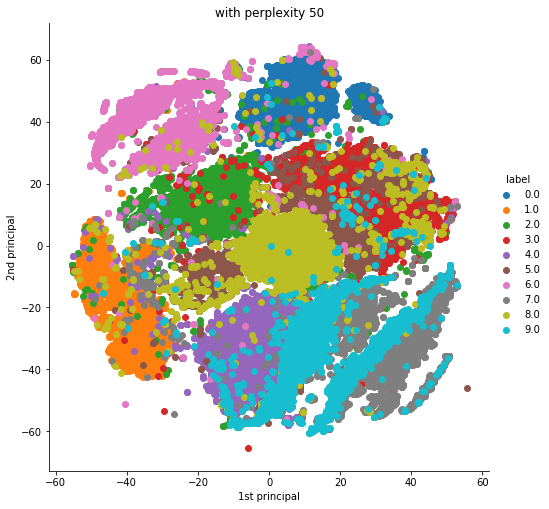

In [20]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2,random_state=0,perplexity=50)

tsne_data = model.fit_transform(sample_data)

#creating the new DataFrame
tsne_data = np.vstack((tsne_data.T,l)).T
tsne_data = pd.DataFrame(data = tsne_data,columns=("1st principal","2nd principal","label"))

sns.FacetGrid(tsne_data,hue = "label",size=7).map(plt.scatter,"1st principal","2nd principal").add_legend()
plt.title("with perplexity 50")
plt.show()

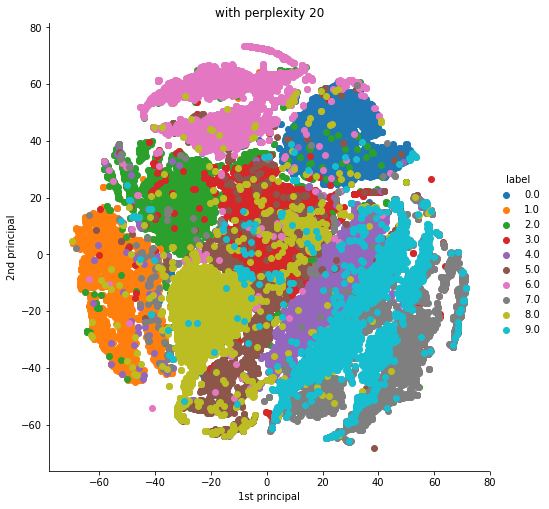

In [21]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2,random_state=0,perplexity=20)

tsne_data = model.fit_transform(sample_data)

#creating the new DataFrame
tsne_data = np.vstack((tsne_data.T,l)).T
tsne_data = pd.DataFrame(data = tsne_data,columns=("1st principal","2nd principal","label"))

sns.FacetGrid(tsne_data,hue = "label",size=7).map(plt.scatter,"1st principal","2nd principal").add_legend()
plt.title("with perplexity 20")
plt.show()

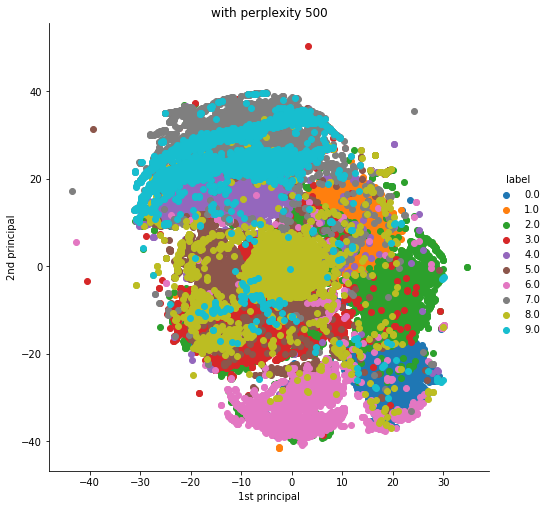

In [22]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2,random_state=0,perplexity=500)

tsne_data = model.fit_transform(sample_data)

#creating the new DataFrame
tsne_data = np.vstack((tsne_data.T,l)).T
tsne_data = pd.DataFrame(data = tsne_data,columns=("1st principal","2nd principal","label"))

sns.FacetGrid(tsne_data,hue = "label",size=7).map(plt.scatter,"1st principal","2nd principal").add_legend()
plt.title("with perplexity 500")
plt.show()

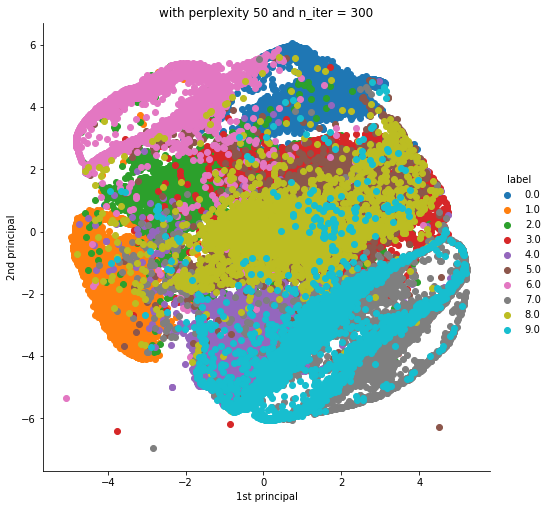

In [23]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2,random_state=0,perplexity=50,n_iter=300)

tsne_data = model.fit_transform(sample_data)

#creating the new DataFrame
tsne_data = np.vstack((tsne_data.T,l)).T
tsne_data = pd.DataFrame(data = tsne_data,columns=("1st principal","2nd principal","label"))

sns.FacetGrid(tsne_data,hue = "label",size=7).map(plt.scatter,"1st principal","2nd principal").add_legend()
plt.title("with perplexity 50 and n_iter = 300")
plt.show()

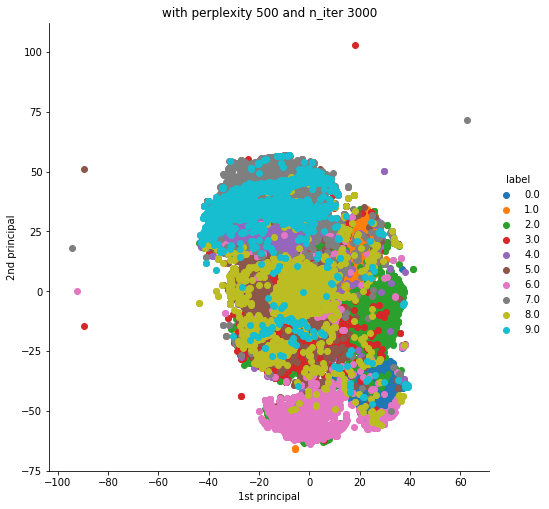

In [24]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2,random_state=0,perplexity=500,n_iter=3000)

tsne_data = model.fit_transform(sample_data)

#creating the new DataFrame
tsne_data = np.vstack((tsne_data.T,l)).T
tsne_data = pd.DataFrame(data = tsne_data,columns=("1st principal","2nd principal","label"))

sns.FacetGrid(tsne_data,hue = "label",size=7).map(plt.scatter,"1st principal","2nd principal").add_legend()
plt.title("with perplexity 500 and n_iter 3000")
plt.show()